<a href="https://colab.research.google.com/github/rakshitrk/handwriten_digit_recogination/blob/master/mnist_digit_recogination.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torchvision
from torchvision import transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


In [0]:
train_data=torchvision.datasets.MNIST(root='./data',train=True,transform=transforms.ToTensor(),download=True)
test_data=torchvision.datasets.MNIST(root='./data',train=False,transform=transforms.ToTensor(),download=True)

train_loader=torch.utils.data.DataLoader(dataset=train_data,batch_size=20,shuffle=True)
test_loader=torch.utils.data.DataLoader(dataset=test_data,batch_size=20,shuffle=False)


**VISUALIZING DATA**

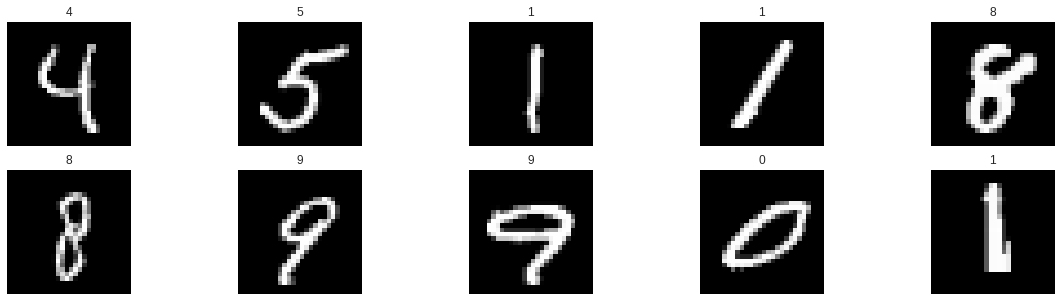

In [5]:

import numpy as np
import matplotlib.pyplot as plt

    
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(20, 5))
for idx in np.arange(10):
    ax = fig.add_subplot(2,10/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    # print out the correct label for each image
    # .item() gets the value contained in a Tensor
    ax.set_title(str(labels[idx].item()))

In [6]:
class Net(nn.Module):
  def __init__(self):
    super (Net,self).__init__()
    h1=512
    h2=512
    self.l1=nn.Linear(28*28,h1)
    self.l2=nn.Linear(h1,h2)
    self.l3=nn.Linear(h2,10)
    self.dropout=nn.Dropout(0.2)
    
  def forward(self,x):
    x=x.view(-1,28*28)
    #activation function and dropout layer after layer 1&2
    x=F.relu(self.l1(x))
    x=self.dropout(x)
    x=F.relu(self.l2(x))
    x=self.dropout(x)
    #output layer
    x=self.l3(x)
    return x
  
net=Net()
print(net)
  

Net(
  (l1): Linear(in_features=784, out_features=512, bias=True)
  (l2): Linear(in_features=512, out_features=512, bias=True)
  (l3): Linear(in_features=512, out_features=10, bias=True)
  (dropout): Dropout(p=0.2)
)


LOSS AND OPTIMIZER

In [0]:
#cross entropy loss
criterion=nn.CrossEntropyLoss()
#stochastic gradient descent and learning rate 0.001
optimizer=optim.SGD(net.parameters(),lr=0.01)


 **TRAIN MODEL**

In [9]:
n=20
for epoch in range(n):
  running_loss=0.0
  
  for data ,target in train_loader:
      #zero th gradients
      optimizer.zero_grad()
      
      #forward 
      out=net(data)
      #losss after forward pass
      loss=criterion(out,target)
      #backwardpass 
      loss.backward()
      # perform a single optimization step (parameter update)
      optimizer.step()
      #updating loss
      running_loss +=loss.item()*data.size(0)
      
  running_loss=running_loss/len(train_loader.dataset)
      
  print('Epoch: {} \tTraining Loss: {:.6f}'.format(
     epoch+1, 
     running_loss
     ))
  

Epoch: 1 	Training Loss: 0.424634
Epoch: 2 	Training Loss: 0.295726
Epoch: 3 	Training Loss: 0.233692
Epoch: 4 	Training Loss: 0.191922
Epoch: 5 	Training Loss: 0.163021
Epoch: 6 	Training Loss: 0.141475
Epoch: 7 	Training Loss: 0.124593
Epoch: 8 	Training Loss: 0.111815
Epoch: 9 	Training Loss: 0.100935
Epoch: 10 	Training Loss: 0.092483
Epoch: 11 	Training Loss: 0.084873
Epoch: 12 	Training Loss: 0.079010
Epoch: 13 	Training Loss: 0.070744
Epoch: 14 	Training Loss: 0.065861
Epoch: 15 	Training Loss: 0.063200
Epoch: 16 	Training Loss: 0.058152
Epoch: 17 	Training Loss: 0.053445
Epoch: 18 	Training Loss: 0.049875
Epoch: 19 	Training Loss: 0.047664
Epoch: 20 	Training Loss: 0.045927


In [0]:
#passing test data in net
for data, target in test_loader:
  out=net(data)
  
  _, pred=torch.max(out,1)
  
  
    


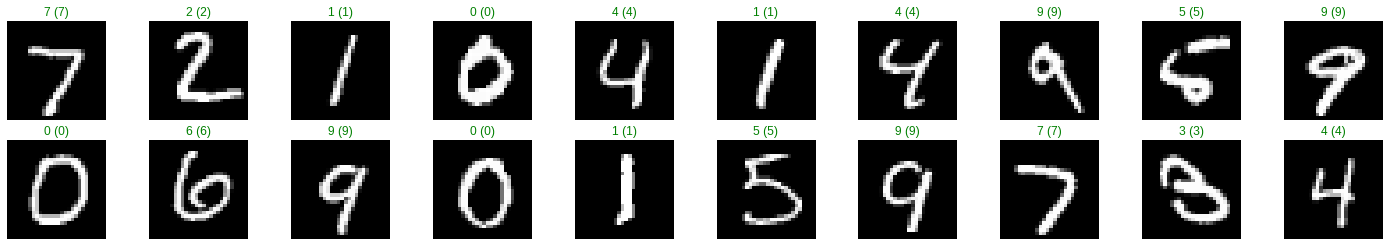

In [11]:
#showing images from test data 
dataiter = iter(test_loader)
images, labels = dataiter.next()

# get sample outputs
output = net(images)
# convert output probabilities to predicted class
_, preds = torch.max(output, 1)
# prep images for display
images = images.numpy()

# batch of images with predicted and actuall label
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())),
                 color=("green" if preds[idx]==labels[idx] else "red"))

In [13]:
#accuracy of model
correct=0
total=0

for data in test_loader:
  images,labels=data
  output=net(images)
  _, pred=torch.max(output.data,1)
  total +=labels.size(0)
  correct +=(pred==labels).sum().item()
  acc=100*correct/total
print('ACCURACY OF NETWORK :',acc,'%')

ACCURACY OF NETWORK : 97.59 %
